1. Implement Linear Regression, Ridge Regression and Lasso Regression on teans dataset.
2. Use cross validation score and RMSE, R2 Score
3. Compare the reults of various regression techniques
4. Finally write your analysis

In [426]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score


In [427]:
teams = pd.read_csv("teams.csv")
teams

team  year  athletes  events   age  height  weight  prev_medals  medals
0     AFG  1964         8       8  22.0   161.0    64.2          0.0       0
1     AFG  1968         5       5  23.2   170.2    70.0          0.0       0
2     AFG  1972         8       8  29.0   168.3    63.8          0.0       0
3     AFG  1980        11      11  23.6   168.4    63.2          0.0       0
4     AFG  2004         5       5  18.6   170.8    64.8          0.0       0
...   ...   ...       ...     ...   ...     ...     ...          ...     ...
2009  ZIM  2000        26      19  25.0   179.0    71.1          0.0       0
2010  ZIM  2004        14      11  25.1   177.8    70.5          0.0       3
2011  ZIM  2008        16      15  26.1   171.9    63.7          3.0       4
2012  ZIM  2012         9       8  27.3   174.4    65.2          4.0       0
2013  ZIM  2016        31      13  27.5   167.8    62.2          0.0       0

[2014 rows x 9 columns]

In [428]:
print(teams.dtypes)

team            object
year             int64
athletes         int64
events           int64
age            float64
height         float64
weight         float64
prev_medals    float64
medals           int64
dtype: object


In [429]:
teams.isnull().sum()

team           0
year           0
athletes       0
events         0
age            0
height         0
weight         0
prev_medals    0
medals         0
dtype: int64

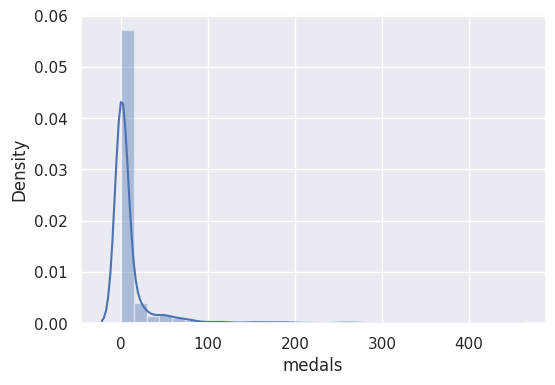

In [430]:
sns.set(rc={'figure.figsize':(6,4)})
sns.distplot(teams['medals'], bins=30)
plt.show()

In [438]:
X = teams.iloc[:,0:13]
Y = teams[['medals']].copy()
x=teams.drop(['team'], axis=1)

In [439]:
x

year  athletes  events   age  height  weight  prev_medals  medals
0     1964         8       8  22.0   161.0    64.2          0.0       0
1     1968         5       5  23.2   170.2    70.0          0.0       0
2     1972         8       8  29.0   168.3    63.8          0.0       0
3     1980        11      11  23.6   168.4    63.2          0.0       0
4     2004         5       5  18.6   170.8    64.8          0.0       0
...    ...       ...     ...   ...     ...     ...          ...     ...
2009  2000        26      19  25.0   179.0    71.1          0.0       0
2010  2004        14      11  25.1   177.8    70.5          0.0       3
2011  2008        16      15  26.1   171.9    63.7          3.0       4
2012  2012         9       8  27.3   174.4    65.2          4.0       0
2013  2016        31      13  27.5   167.8    62.2          0.0       0

[2014 rows x 8 columns]

In [440]:
Y

medals
0          0
1          0
2          0
3          0
4          0
...      ...
2009       0
2010       3
2011       4
2012       0
2013       0

[2014 rows x 1 columns]

In [441]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test =  train_test_split(x, Y, test_size = 0.3)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1409, 8)
(605, 8)
(1409, 1)
(605, 1)


Linear regression

In [442]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [443]:
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.2, random_state=42)

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

y_pred_linear = linear_reg.predict(X_test)

rmse_linear = mean_squared_error(y_test, y_pred_linear, squared=False)
r2_linear = r2_score(y_test, y_pred_linear)

cross_val_linear = cross_val_score(linear_reg, x, Y, cv=5).mean()

print("Linear Regression:")
print("Cross-validation score:", cross_val_linear)
print("RMSE:", rmse_linear)
print("R2 Score:", r2_linear)


Linear Regression:
Cross-validation score: 1.0
RMSE: 1.6425107299732896e-13
R2 Score: 1.0


In [444]:
lr_model = LinearRegression()

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(lr_model, x, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean MAE: 0.000 (0.000)


Ridge regression

In [445]:
ridge=Ridge()
ridge_regressor.fit(x,Y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [446]:
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

y_pred_ridge = ridge_reg.predict(X_test)

rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
r2_ridge = r2_score(y_test, y_pred_ridge)

cross_val_ridge = cross_val_score(ridge_reg, x, Y, cv=5).mean()

print("\nRidge Regression:")
print("Cross-validation score:", cross_val_ridge)
print("RMSE:", rmse_ridge)
print("R2 Score:", r2_ridge)


Ridge Regression:
Cross-validation score: 0.9999999999963904
RMSE: 5.098432635490895e-05
R2 Score: 0.9999999999965081


In [447]:
ridge_model = Ridge(alpha=1.0)

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(ridge_model, x, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean MAE: 0.000 (0.000)


Lasso regression

In [448]:
lasso=Lasso()
lasso_regressor.fit(x,Y)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [449]:
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

y_pred_lasso = lasso_reg.predict(X_test)

rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)
r2_lasso = r2_score(y_test, y_pred_lasso)

cross_val_lasso = cross_val_score(lasso_reg,x, Y, cv=5).mean()

print("\nLasso Regression:")
print("Cross-validation score:", cross_val_lasso)
print("RMSE:", rmse_lasso)
print("R2 Score:", r2_lasso)


Lasso Regression:
Cross-validation score: 0.9999967959368744
RMSE: 0.03802711489268349
R2 Score: 0.9999980574313676


In [450]:
lasso_model = Lasso(alpha=1.0)

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(lasso_model, x, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean MAE: 0.019 (0.003)


In [451]:
X = teams.iloc[:,0:100]
Y = teams['medals']
X_train, X_test, Y_train, Y_test =  train_test_split(x, Y, test_size = 0.9)

folds   = 200
metric  = "neg_mean_squared_error"


models = {}
models["Linear"]        = LinearRegression()
models["Lasso"]         = Lasso()
models['Ridge']         = Ridge()

model_results = []
model_names   = []
for model_name in models:
	model   = models[model_name]
	k_fold  = KFold(n_splits=folds)
	results = cross_val_score(model, X_train, Y_train, cv=k_fold, scoring=metric)

	model_results.append(results)
	model_names.append(model_name)
	print("{}: {}, {}".format(model_name, round(results.mean(), 8), round(results.std(), 2)))

Linear: -0.0, 0.0
Lasso: -0.00388857, 0.04
Ridge: -3.7e-07, 0.0


## another method when considering only 4 values

In [480]:
X = teams[["athletes", "age", "weight", "prev_medals"]].copy()
y = teams[["medals"]].copy()

In [481]:
X

athletes   age  weight  prev_medals
0            8  22.0    64.2          0.0
1            5  23.2    70.0          0.0
2            8  29.0    63.8          0.0
3           11  23.6    63.2          0.0
4            5  18.6    64.8          0.0
...        ...   ...     ...          ...
2009        26  25.0    71.1          0.0
2010        14  25.1    70.5          0.0
2011        16  26.1    63.7          3.0
2012         9  27.3    65.2          4.0
2013        31  27.5    62.2          0.0

[2014 rows x 4 columns]

In [482]:
y

medals
0          0
1          0
2          0
3          0
4          0
...      ...
2009       0
2010       3
2011       4
2012       0
2013       0

[2014 rows x 1 columns]

In [483]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
teams['team'] = label_encoder.fit_transform(teams['team'])
teams.head(10)

team  year  athletes  events   age  height  weight  prev_medals  medals
0     0  1964         8       8  22.0   161.0    64.2          0.0       0
1     0  1968         5       5  23.2   170.2    70.0          0.0       0
2     0  1972         8       8  29.0   168.3    63.8          0.0       0
3     0  1980        11      11  23.6   168.4    63.2          0.0       0
4     0  2004         5       5  18.6   170.8    64.8          0.0       0
5     0  2008         4       4  22.5   179.2    62.8          0.0       1
6     0  2012         6       6  24.8   171.7    60.8          1.0       1
7     0  2016         3       3  24.7   173.7    74.0          1.0       0
8     1  1964         4       4  28.5   171.2    69.4          0.0       0
9     1  1968         5       4  31.0   173.2    67.8          0.0       0

In [484]:
X_train, X_test, Y_train, Y_test =  train_test_split(X, y, test_size = 0.3)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1409, 4)
(605, 4)
(1409, 1)
(605, 1)


Linear regression

In [485]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [486]:
Y_test_predict = lin_model.predict(X_test)

rmse = (np.sqrt(mean_squared_error(Y_test, Y_test_predict)))
r2 = r2_score(Y_test, Y_test_predict)

print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

RMSE is 14.706761449382942
R2 score is 0.8556049655553737


Ridge Regression

In [487]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, Y_train)

pred_train_rr= rr.predict(X_train)
print('RMSE of Training data:',np.sqrt(mean_squared_error(Y_train,pred_train_rr)))
print('R2 of Training data:',r2_score(Y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print('RMSE of Test data:',np.sqrt(mean_squared_error(Y_test,pred_test_rr)))
print('R2 of Test data:',r2_score(Y_test, pred_test_rr))

RMSE of Training data: 11.259530659322778
R2 of Training data: 0.8691589977029935
RMSE of Test data: 14.706761097722882
R2 of Test data: 0.8556049724607642


In [488]:
X = teams.iloc[:,0:6]
Y = teams['medals']

ridge_model = Ridge(alpha=0.5)

cv = RepeatedKFold(n_splits=10, n_repeats=6, random_state=1)

scores = cross_val_score(ridge_model, X, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean MAE: 7.588 (0.979)


Lasso regression

In [489]:
model_lasso = Lasso(alpha=0.05)
model_lasso.fit(X_train, Y_train)
pred_train_lasso= model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(Y_train,pred_train_lasso)))
print(r2_score(Y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(Y_test,pred_test_lasso)))
print(r2_score(Y_test, pred_test_lasso))

11.259550824900028
0.8691585290357317
14.703553257773876
0.8556679565017112


In [490]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=1.0)

cv = RepeatedKFold(n_splits=10, n_repeats=6, random_state=1)

scores = cross_val_score(lasso_model, X, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean MAE: 7.521 (0.983)


As per my analysis linear regression value is accepted